# **Melbourne Housing Prediction Project**

## Import Packages and Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [3]:
df=pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")
print("shape of the data: ",df.shape)

shape of the data:  (13580, 21)


In [4]:
pd.set_option('display.max_columns', None)
data=df.copy()
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Exploring Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
data.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [8]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# EDA 

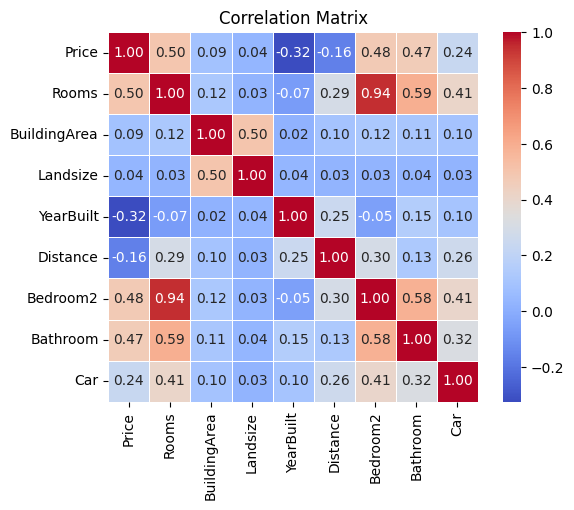

In [11]:
num_cols = ['Price', 'Rooms', 'BuildingArea', 'Landsize', 'YearBuilt', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
correlation_matrix=data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidth= 0.5)
plt.title("Correlation Matrix")
plt.show()

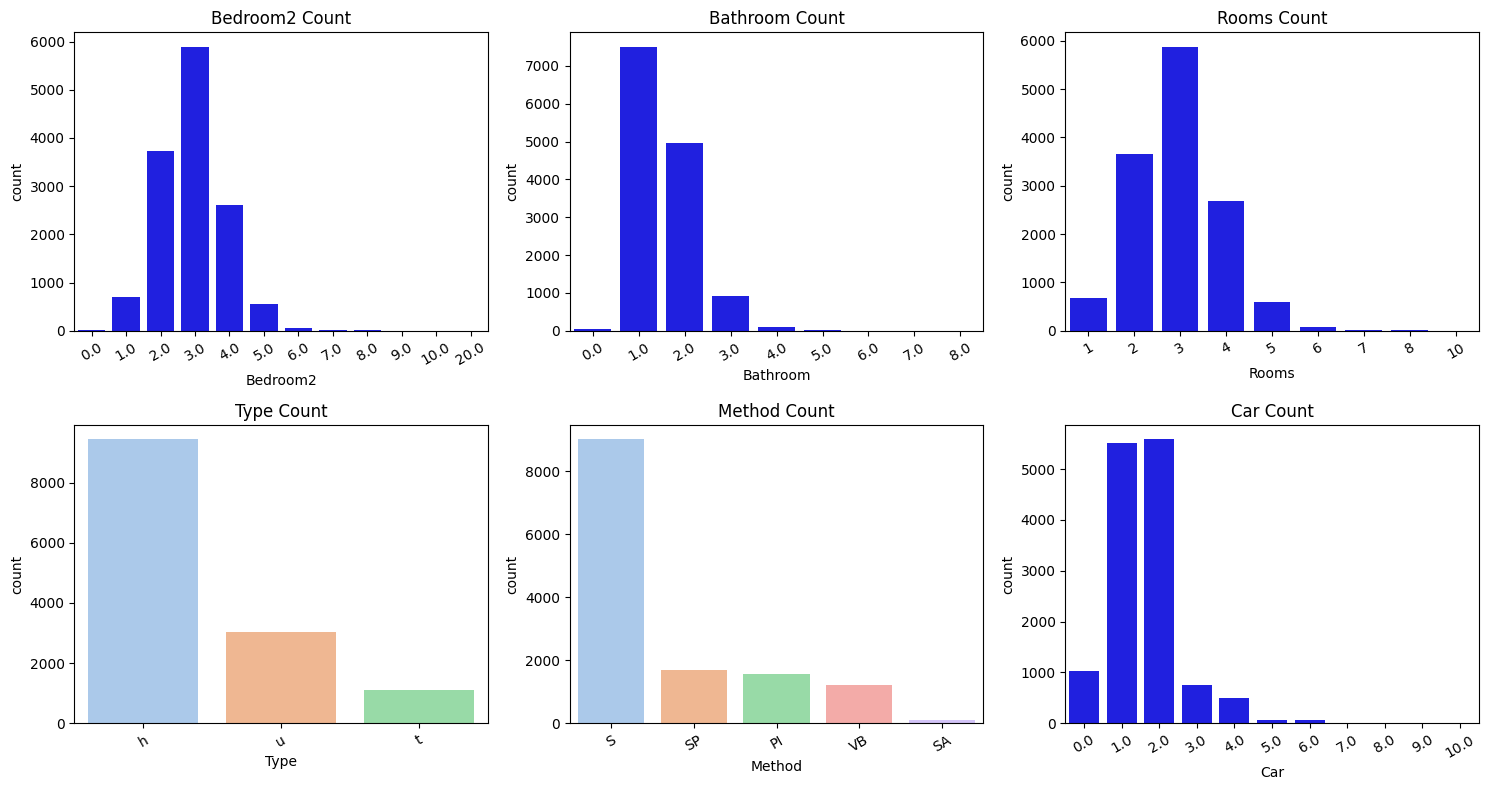

In [20]:
cols= ['Bedroom2', 'Bathroom', 'Rooms', 'Type', 'Method', 'Car']
n_cols= 3
n_rows= int(np.ceil(len(cols) / n_cols))
plt.figure(figsize= (n_cols*5, n_rows*4))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if data[col].dtype in ['int64', 'float64']:
        sns.countplot(x=data[col], color='blue')
    else:
        sns.countplot(data=data, x=col, palette='pastel')

    plt.title(f"{col} Count")
    plt.xticks(rotation= 30)

plt.tight_layout()
plt.show()


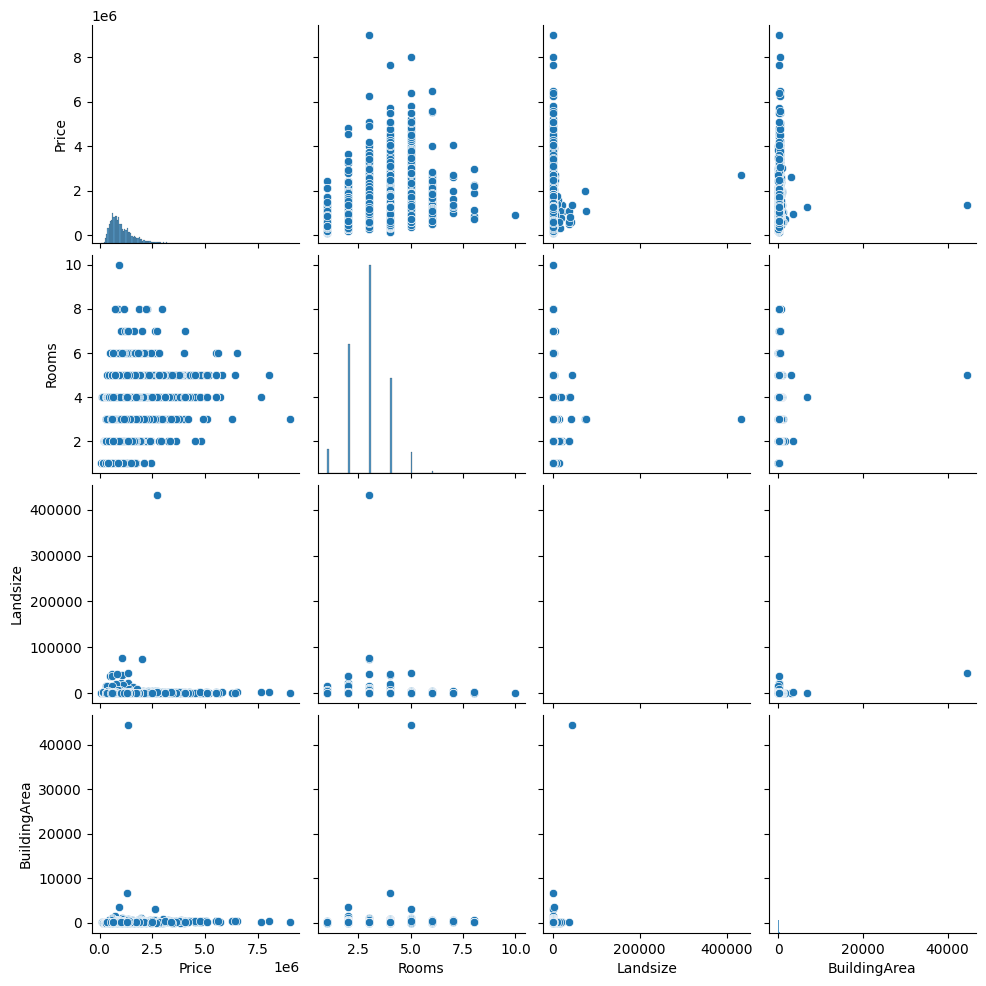

In [23]:
num_cols = ['Price', 'Rooms', 'Landsize', 'BuildingArea']

sns.pairplot(data[num_cols])
plt.show()

### **summary:**
##### It is not logical for the values of 0 in the Bathroom and Bedroom2 columns. This is clearly an input error that needs to be handled during data cleaning.

##### numeric features are skewed with many outliers


# Date Cleaning 

In [24]:
data[['BuildingArea', 'Landsize']].describe()

,BuildingArea,Landsize
count,7130.000000,13580.000000
mean,151.967650,558.416127
std,541.014538,3990.669241
min,0.000000,0.000000
25%,93.000000,177.000000
50%,126.000000,440.000000
75%,174.000000,651.000000
max,44515.000000,433014.000000


### **Summary:**

##### -BuildingArea & Landsize contain zeros (likely missing/wrong data) and extreme outliers.

##### -Large std compared to mean → high variance. 

##### -Will need to handle missing/invalid values and consider treating/removing outliers before modeling. 

In [25]:
print((data['BuildingArea']==0).sum())

17


In [26]:
data[data['BuildingArea']==0].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4344,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,2.0,1.0,1.0,215.0,0.0,2000.0,Melbourne,-37.79530,144.94370,Northern Metropolitan,6821.0
12226,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104.0,5.0,3.0,2.0,743.0,0.0,1949.0,NaN,-37.80235,145.09311,Southern Metropolitan,7809.0
12249,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083.0,3.0,1.0,2.0,542.0,0.0,1970.0,NaN,-37.70861,145.05691,Northern Metropolitan,10175.0
12395,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,3/09/2017,20.6,3064.0,4.0,2.0,2.0,504.0,0.0,2000.0,NaN,-37.61419,144.93448,Northern Metropolitan,5833.0
12412,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,3/09/2017,7.0,3071.0,3.0,2.0,2.0,120.0,0.0,2000.0,NaN,-37.76343,145.02096,Northern Metropolitan,8870.0


In [27]:
data['BuildingArea'].replace(0, np.nan, inplace=True)

In [28]:
data['BuildingArea'].isna().sum()

6467

In [29]:
print((data['Landsize']==0).sum())

1939


In [30]:
data[data['Landsize']==0].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8110,145.0067,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4019.0
14,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,14/05/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8016,144.9988,Northern Metropolitan,4019.0
21,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,18/03/2017,2.5,3067.0,3.0,2.0,2.0,0.0,NaN,2010.0,Yarra,-37.8093,144.9959,Northern Metropolitan,4019.0


In [31]:
data['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [32]:
# most of land size that equal 0 is of type u
print(data[data['Landsize']==0]['Type'].value_counts())

Type
u    1629
h     171
t     139
Name: count, dtype: int64


In [33]:
data.loc[(data['Landsize']==0) & (data['Type'] != 'u'), 'Landsize']= np.nan

In [34]:
print(data[data['Landsize']==0]['Type'].value_counts())

Type
u    1629
Name: count, dtype: int64


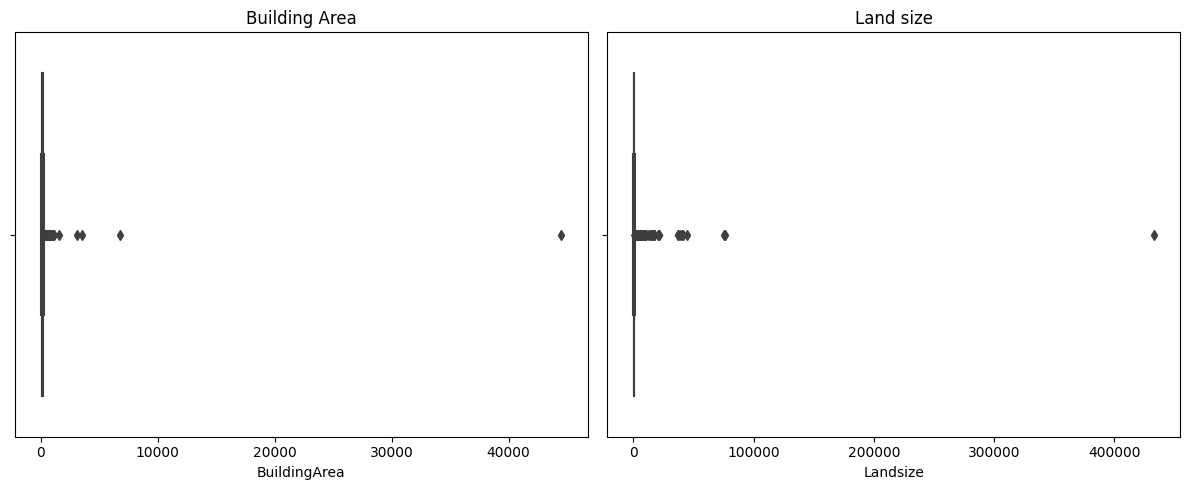

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=data['BuildingArea'])
plt.title("Building Area")

plt.subplot(1,2,2)
sns.boxplot(x=data['Landsize'])
plt.title("Land size")

plt.tight_layout()
plt.show()

#### **Handling Outliers:**

In [36]:
Q1= data['BuildingArea'].quantile(0.25)
Q3= data['BuildingArea'].quantile(0.75)
IQR= Q3-Q1
outliers= data[(data['BuildingArea'] < Q1 - 1.5*IQR) | (data['BuildingArea'] > Q3 + 1.5*IQR)]
print(f"BuildingArea has {len(outliers)} outlier")

BuildingArea has 353 outlier


In [37]:
Q1= data['Landsize'].quantile(0.25)
Q3= data['Landsize'].quantile(0.75)
IQR= Q3-Q1
outliers= data[(data['Landsize'] < Q1 - 1.5*IQR) | (data['Landsize'] > Q3 + 1.5*IQR)]
print(f"Landsize has {len(outliers)} outlier")

Landsize has 370 outlier


In [38]:
def cap_outliers(df, column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= np.where(df[column]<lower_bound, lower_bound, df[column])
    df[column]= np.where(df[column]>upper_bound, upper_bound, df[column])
    return df

data= cap_outliers(data, 'BuildingArea')
data= cap_outliers(data, 'Landsize')

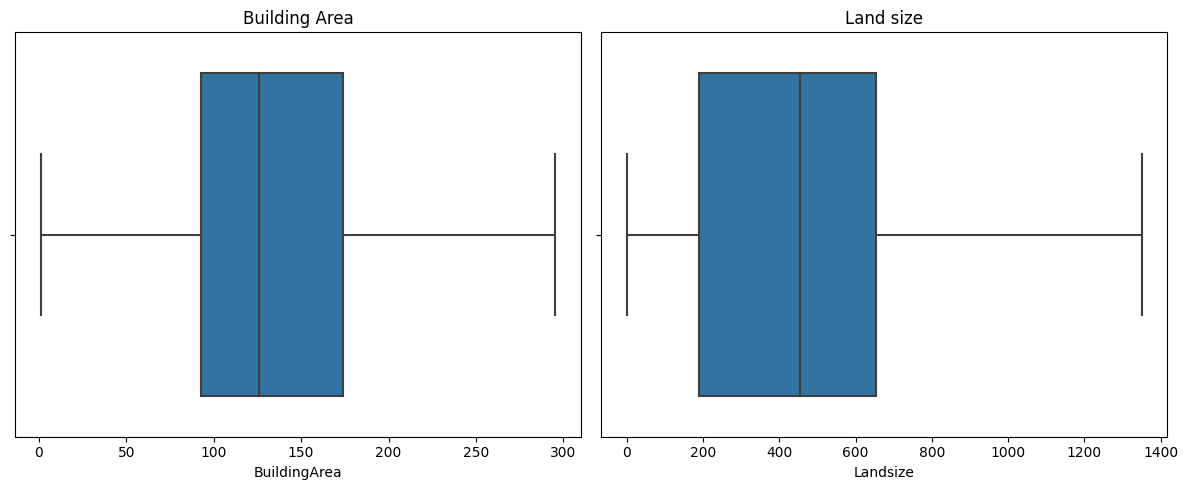

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=data['BuildingArea'])
plt.title("Building Area")

plt.subplot(1,2,2)
sns.boxplot(x=data['Landsize'])
plt.title("Land size")

plt.tight_layout()
plt.show()

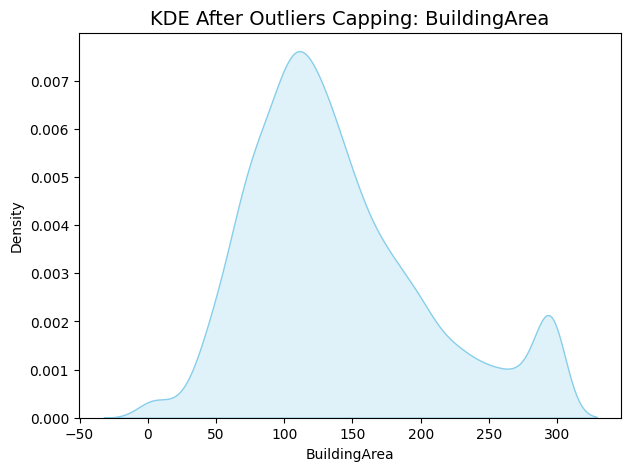

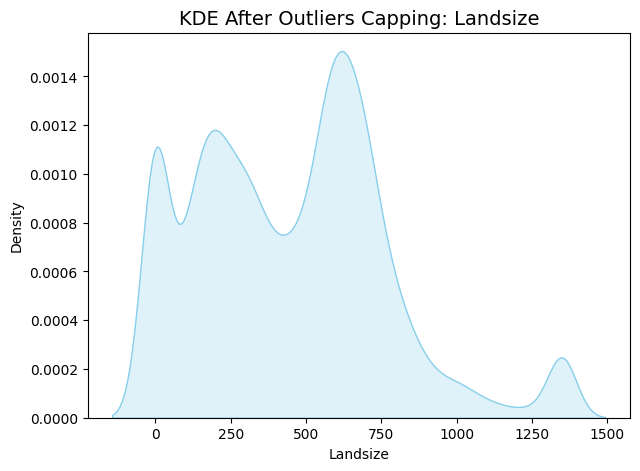

In [40]:
def plt_kde(df, column):
    plt.figure(figsize=(7,5))
    sns.kdeplot(df[column], fill=True, color="skyblue")
    plt.title(f"KDE After Outliers Capping: {column}", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

plt_kde(data, 'BuildingArea')
plt_kde(data, 'Landsize')

In [41]:
# checking again

data[['BuildingArea', 'Landsize']].describe()

,BuildingArea,Landsize
count,7113.000000,13270.000000
mean,139.092348,450.453655
std,65.792816,318.778927
min,1.000000,0.000000
25%,93.000000,190.000000
50%,126.000000,454.500000
75%,174.000000,654.000000
max,295.500000,1350.000000


In [42]:
data['BuildingArea']= data.groupby(['Regionname', 'Type'])['BuildingArea']\
.transform(lambda x: x.fillna(x.median()))

In [43]:
data['BuildingArea'].isna().sum()

0

In [44]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize          310
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [45]:
data['Landsize']= data.groupby(['Regionname', 'Type'])['Landsize']\
.transform(lambda x:x.fillna(x.median()))

In [46]:
data['Landsize'].isna().sum()

0

In [47]:
count_wrong= data[(data['BuildingArea'] > data['Landsize']) & data['Landsize'] >0].shape[0]
print(f"Number of rows where BuildingArea > Landsize and Landsize > 0: {count_wrong}")

Number of rows where BuildingArea > Landsize and Landsize > 0: 507


In [48]:
mask= data['BuildingArea']> data['Landsize']
data.loc[mask, 'BuildingArea']= data.loc[mask, 'Landsize']

In [49]:
data= data.dropna(subset= ['Car'])

In [50]:
data['Car'].isna().sum()

0

In [51]:
data.shape

(13518, 21)

In [52]:
data['Address'].nunique()

13318

### Note:
#### Since approximately each row has a unique address, I will drop this column as it appears to have no relevant predictive value.

In [53]:
data.drop(['Address'], axis=1, inplace=True)

In [54]:
data['YearBuilt'].isna().sum()

5344

In [55]:
data['YearBuilt'].describe()

count    8174.000000
mean     1964.896501
std        37.128773
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [56]:
data[data['YearBuilt']<1800]['YearBuilt'].count()

1

In [57]:
median_year= data['YearBuilt'].median()
data['YearBuilt'].fillna(median_year, inplace=True)

In [58]:
data['YearBuilt'].isna().sum()

0

In [59]:
data['CouncilArea'].isna().sum()

1307

In [60]:
data['CouncilArea'].value_counts()

CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64

In [61]:
data['Suburb'].value_counts()

Suburb
Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         221
                 ... 
Sandhurst           1
Bullengarook        1
Montrose            1
Croydon South       1
Monbulk             1
Name: count, Length: 314, dtype: int64

In [62]:
# Fill missing 'CouncilArea' values based on the most frequent value (mode) in each 'Suburb'

data['CouncilArea']= data.groupby('Suburb')['CouncilArea'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

In [63]:
data['CouncilArea'].isna().sum()

7

In [64]:
data['CouncilArea'].fillna('Unavailable', inplace=True)

In [65]:
data['CouncilArea'].isna().sum()

0

In [66]:
data.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [67]:
data.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [68]:
cols_to_int= ['Bedroom2', 'Bathroom', 'Car']
for col in cols_to_int:
    data[col]= data[col].astype(int)

In [69]:
data['Bedroom2'].value_counts()

Bedroom2
3     5867
2     3711
4     2597
1      688
5      556
6       63
0       16
7       10
8        5
9        3
20       1
10       1
Name: count, dtype: int64

In [70]:
data.loc[data['Bedroom2'] == 0, 'Bedroom2']= np.nan
data['Bedroom2']= data.groupby(['Type', 'Rooms'])['Bedroom2'].transform(
    lambda x :x.fillna(x.mode()[0] if not x.mode().empty else np.nan) 
)

In [71]:
data['Bedroom2'].isna().sum()

0

In [72]:
data.loc[data['Bedroom2'] > data['Rooms'], 'Bedroom2']= data['Rooms']

In [73]:
data['Bedroom2'].describe()

count    13518.000000
mean         2.901465
std          0.943266
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Bedroom2, dtype: float64

In [74]:
data['Bathroom'].value_counts()

Bathroom
1    7467
2    4958
3     916
4     106
0      34
5      28
6       5
7       2
8       2
Name: count, dtype: int64

In [75]:
bathroom_zero= data[data['Bathroom']==0][['Type', 'Price', 'Rooms', 'Bedroom2', 'Bathroom']]
print(bathroom_zero['Type'].value_counts())

Type
u    17
h    15
t     2
Name: count, dtype: int64


In [76]:
print((bathroom_zero))

      Type      Price  Rooms  Bedroom2  Bathroom
139      h  1485000.0      3       3.0         0
281      u   546000.0      2       2.0         0
505      u   497500.0      2       2.0         0
584      h  1010000.0      2       2.0         0
913      h   700000.0      3       3.0         0
1063     h  1900000.0      3       3.0         0
1070     t  1067000.0      3       3.0         0
1593     h  1400000.0      4       3.0         0
2253     u   410000.0      2       2.0         0
2777     h   845000.0      2       2.0         0
2797     h  1550000.0      4       4.0         0
2808     u   545000.0      2       2.0         0
3390     u   460000.0      2       2.0         0
3556     u   526000.0      2       2.0         0
3787     h   780000.0      2       2.0         0
4880     h  1004000.0      4       3.0         0
5535     u   760500.0      1       1.0         0
5642     u  1072000.0      3       3.0         0
5711     u   910000.0      2       2.0         0
6392     u   857000.

In [77]:
data.loc[data['Bathroom'] == 0, 'Bathroom'] = np.nan

data['Bathroom']= data.groupby('Type')['Bathroom'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median())
)

In [78]:
data['Bathroom'].describe()

count    13518.000000
mean         1.538023
std          0.688525
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Bathroom, dtype: float64

In [79]:
data['Car'].value_counts()

Car
2     5591
1     5509
0     1026
3      748
4      506
5       63
6       54
8        9
7        8
10       3
9        1
Name: count, dtype: int64

## Feature Engineering 

In [80]:
data['Year']= pd.to_datetime(data['Date'], dayfirst=True).dt.year
data['Age']= data['Year']-data['YearBuilt']

In [81]:
data.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Year', 'Age'],
      dtype='object')

In [82]:
data[data['Age']<0]['Age'].count()

6

In [83]:
data= data[data['Age']>=0].copy()
data.drop(['Year', 'YearBuilt'], axis=1, inplace=True)

In [84]:
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1,202.0,125.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,46.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,116.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0,134.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1,94.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,47.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2,120.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0


In [85]:
from sklearn.cluster import KMeans

coords= data[['Lattitude', 'Longtitude']]
kmeans= KMeans(n_clusters=10, random_state=42)
data['geo_cluster']= kmeans.fit_predict(coords)

In [86]:
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,geo_cluster
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1,202.0,125.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,46.0,4
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,116.0,4
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0,134.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0,4
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1,94.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,47.0,4
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2,120.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0,4


In [87]:
data['Postcode'].value_counts()

Postcode
3073.0    358
3020.0    305
3040.0    290
3121.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: count, Length: 198, dtype: int64

In [88]:
data.drop('Postcode', axis=1, inplace=True)

In [89]:
data['SellerG'].value_counts()

SellerG
Nelson           1556
Jellis           1303
hockingstuart    1160
Barry            1009
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: count, Length: 268, dtype: int64

In [90]:
data.drop('SellerG', axis=1, inplace=True)

## Handling Categorical and Text Attributes by Encoding

In [91]:
data= pd.get_dummies(data, columns=['Type'], drop_first=True)

In [92]:
data.head()

,Suburb,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,geo_cluster,Type_t,Type_u
0,Abbotsford,2,1480000.0,S,3/12/2016,2.5,2.0,1.0,1,202.0,125.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,46.0,4,False,False
1,Abbotsford,2,1035000.0,S,4/02/2016,2.5,2.0,1.0,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,116.0,4,False,False
2,Abbotsford,3,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0,134.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0,4,False,False
3,Abbotsford,3,850000.0,PI,4/03/2017,2.5,3.0,2.0,1,94.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,47.0,4,False,False
4,Abbotsford,4,1600000.0,VB,4/06/2016,2.5,3.0,1.0,2,120.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0,4,False,False


In [93]:
data['Method'].value_counts()

Method
S     8982
SP    1695
PI    1557
VB    1187
SA      91
Name: count, dtype: int64

In [94]:
data.groupby('Method')['Price'].mean()

Method
PI    1.132014e+06
S     1.086640e+06
SA    1.026165e+06
SP    8.995220e+05
VB    1.164748e+06
Name: Price, dtype: float64

#### The average Price varies significantly depending on sales method 

In [95]:
data= pd.get_dummies(data, columns=['Method'], drop_first=True)
data.head()

,Suburb,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,geo_cluster,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,2,1480000.0,3/12/2016,2.5,2.0,1.0,1,202.0,125.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,46.0,4,False,False,True,False,False,False
1,Abbotsford,2,1035000.0,4/02/2016,2.5,2.0,1.0,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,116.0,4,False,False,True,False,False,False
2,Abbotsford,3,1465000.0,4/03/2017,2.5,3.0,2.0,0,134.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0,4,False,False,False,False,True,False
3,Abbotsford,3,850000.0,4/03/2017,2.5,3.0,2.0,1,94.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,47.0,4,False,False,False,False,False,False
4,Abbotsford,4,1600000.0,4/06/2016,2.5,3.0,1.0,2,120.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0,4,False,False,False,False,False,True


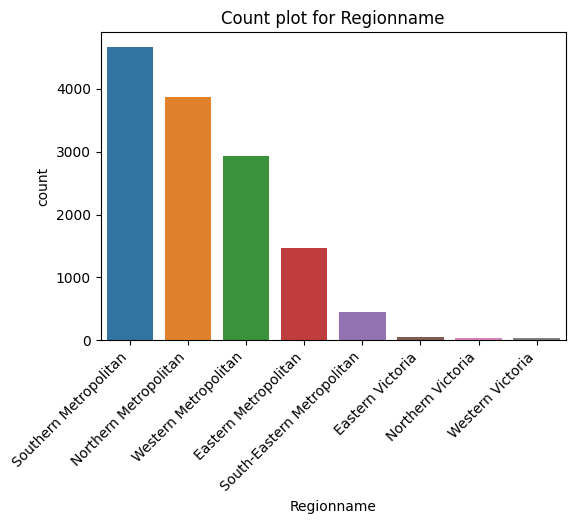

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Regionname', order=data['Regionname'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Count plot for Regionname")
plt.show()

In [97]:
data['Regionname'].value_counts()

Regionname
Southern Metropolitan         4667
Northern Metropolitan         3868
Western Metropolitan          2935
Eastern Metropolitan          1467
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               40
Western Victoria                32
Name: count, dtype: int64

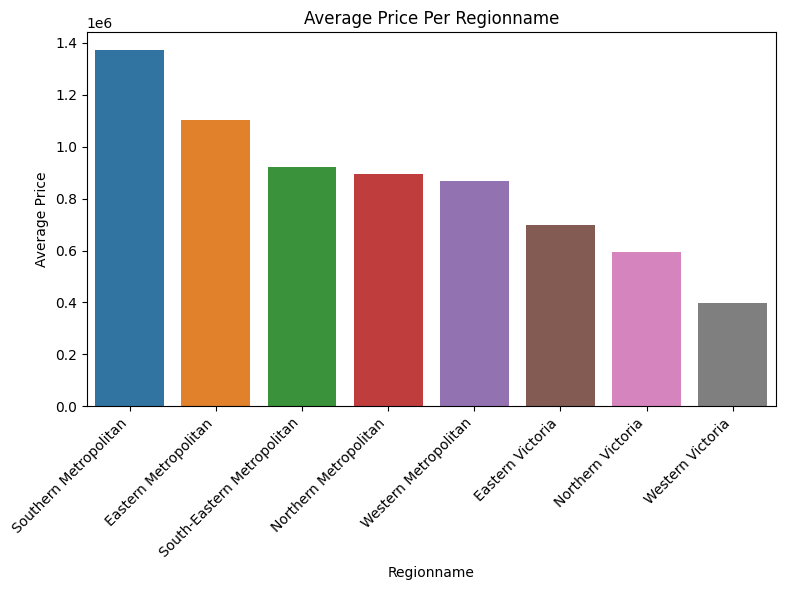

In [98]:
region_price= data.groupby('Regionname')['Price'].mean().reset_index()
region_price= region_price.sort_values(by='Price', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(data=region_price, x='Regionname', y='Price')
plt.xticks(rotation=45, ha='right')
plt.title("Average Price Per Regionname")
plt.xlabel("Regionname")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

### **Summary**:
##### The number of 'Metropolitan' regions is higher than regions in 'Victoria',
##### and their prices tend to be consistently higher.
##### Therefore, we will create a binary feature:
##### 1 for 'Metropolitan' and 0 for 'Victoria' to capture this distinction.

In [100]:
data['Region_binary']= data['Regionname'].apply(lambda x: 1 if 'Metropolitan' in x else 0)
data.head()

,Suburb,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,geo_cluster,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Region_binary
0,Abbotsford,2,1480000.0,3/12/2016,2.5,2.0,1.0,1,202.0,125.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,46.0,4,False,False,True,False,False,False,1
1,Abbotsford,2,1035000.0,4/02/2016,2.5,2.0,1.0,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,116.0,4,False,False,True,False,False,False,1
2,Abbotsford,3,1465000.0,4/03/2017,2.5,3.0,2.0,0,134.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0,4,False,False,False,False,True,False,1
3,Abbotsford,3,850000.0,4/03/2017,2.5,3.0,2.0,1,94.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,47.0,4,False,False,False,False,False,False,1
4,Abbotsford,4,1600000.0,4/06/2016,2.5,3.0,1.0,2,120.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2.0,4,False,False,False,False,False,True,1


In [101]:
data.drop('Regionname', axis=1, inplace=True)

In [102]:
data['CouncilArea'].value_counts()

CouncilArea
Boroondara           1277
Moreland             1246
Moonee Valley        1073
Darebin              1002
Glen Eira             898
Stonnington           752
Maribyrnong           730
Yarra                 671
Port Phillip          650
Banyule               645
Bayside               554
Melbourne             477
Brimbank              473
Hobsons Bay           465
Monash                407
Whitehorse            373
Manningham            358
Kingston              278
Hume                  243
Whittlesea            222
Wyndham               122
Maroondah             115
Knox                  109
Melton                 84
Frankston              79
Greater Dandenong      64
Nillumbik              50
Casey                  46
Yarra Ranges           22
Macedon Ranges         10
Cardinia                8
Unavailable             8
Moorabool               1
Name: count, dtype: int64

In [104]:
counts= data['CouncilArea'].value_counts()
to_replace= counts[counts<50].index
data['CouncilArea']= data['CouncilArea'].replace(to_replace, 'Unavailable')

In [105]:
data['CouncilArea'].value_counts()

CouncilArea
Boroondara           1277
Moreland             1246
Moonee Valley        1073
Darebin              1002
Glen Eira             898
Stonnington           752
Maribyrnong           730
Yarra                 671
Port Phillip          650
Banyule               645
Bayside               554
Melbourne             477
Brimbank              473
Hobsons Bay           465
Monash                407
Whitehorse            373
Manningham            358
Kingston              278
Hume                  243
Whittlesea            222
Wyndham               122
Maroondah             115
Knox                  109
Unavailable            95
Melton                 84
Frankston              79
Greater Dandenong      64
Nillumbik              50
Name: count, dtype: int64

In [106]:
freq= data['CouncilArea'].value_counts().reset_index()
freq.columns= ['CouncilArea', 'Frequency']
mean_price= data.groupby('CouncilArea')['Price'].mean().reset_index()
freq_price= freq.merge(mean_price, on='CouncilArea', how='left')
correlation= freq_price['Frequency'].corr(freq_price['Price'])
print("Correlation between Frequency and Price:", correlation)

Correlation between Frequency and Price: 0.5104898716969151


#### I will use frequency encoding; it might enhance our model's performance.
#### Not 100% sure, but let's try and see how it goes.

In [107]:
freq_encoding= data['CouncilArea'].value_counts(normalize=True)
data['CouncilArea']= data['CouncilArea'].map(freq_encoding)

In [108]:
data['CouncilArea']

0        0.049660
1        0.049660
2        0.049660
3        0.049660
4        0.049660
           ...   
13575    0.030121
13576    0.034414
13577    0.034414
13578    0.034414
13579    0.054026
Name: CouncilArea, Length: 13512, dtype: float64

In [109]:
data['Suburb'].nunique()

314

In [110]:
suburb_counts= data['Suburb'].value_counts()
to_replace= suburb_counts[suburb_counts <10].index
data['Suburb']= data['Suburb'].replace(to_replace, 'Other')
data['Suburb'].nunique()

213

In [111]:
suburb_freq= data['Suburb'].value_counts().reset_index()
suburb_freq.columns= ['Suburb', 'Frequency']
suburb_price= data.groupby('Suburb')['Price'].mean().reset_index()
freq_price= suburb_freq.merge(suburb_price, on='Suburb', how='left')
correlation= freq_price['Frequency'].corr(freq_price['Price'])

print(f"Correlation between frequency and price: {correlation}")

Correlation between frequency and price: 0.18926088916335906


## Warning!
#### Freq Encoding will not work well here
#### Let's Try Target Encoding 
#### We will use KFold to avoid data leakage
#### I will apply Target Encoding later during the train-test stage to avoid leaking information into the test set.

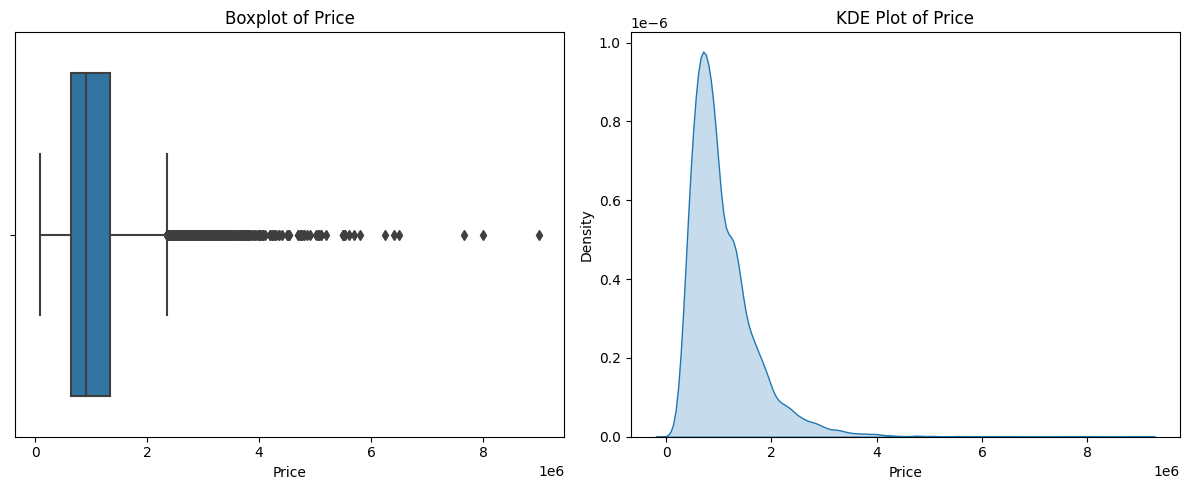

In [113]:
# check outliers of price 
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')

plt.subplot(1, 2, 2)
sns.kdeplot(data['Price'], shade=True)
plt.title('KDE Plot of Price')

plt.tight_layout()
plt.show()

In [114]:
threshold= df['Price'].quantile(0.99)
outliers= df[df['Price'] > threshold]
print(outliers['Type'].value_counts())

Type
h    134
u      1
t      1
Name: count, dtype: int64


# **Note:**
#### I won’t remove outliers here in the price because it seems that they represent luxury houses, especially since their density is low in the KDE plot.

In [116]:
data.head()

,Suburb,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Propertycount,Age,geo_cluster,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Region_binary
0,Abbotsford,2,1480000.0,3/12/2016,2.5,2.0,1.0,1,202.0,125.0,0.04966,-37.7996,144.9984,4019.0,46.0,4,False,False,True,False,False,False,1
1,Abbotsford,2,1035000.0,4/02/2016,2.5,2.0,1.0,0,156.0,79.0,0.04966,-37.8079,144.9934,4019.0,116.0,4,False,False,True,False,False,False,1
2,Abbotsford,3,1465000.0,4/03/2017,2.5,3.0,2.0,0,134.0,134.0,0.04966,-37.8093,144.9944,4019.0,117.0,4,False,False,False,False,True,False,1
3,Abbotsford,3,850000.0,4/03/2017,2.5,3.0,2.0,1,94.0,94.0,0.04966,-37.7969,144.9969,4019.0,47.0,4,False,False,False,False,False,False,1
4,Abbotsford,4,1600000.0,4/06/2016,2.5,3.0,1.0,2,120.0,120.0,0.04966,-37.8072,144.9941,4019.0,2.0,4,False,False,False,False,False,True,1


In [117]:
data.drop('Date', axis=1, inplace=True)

In [118]:
data.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Propertycount', 'Age', 'geo_cluster', 'Type_t', 'Type_u', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB', 'Region_binary'],
      dtype='object')

In [119]:
data.dtypes

Suburb            object
Rooms              int64
Price            float64
Distance         float64
Bedroom2         float64
Bathroom         float64
Car                int64
Landsize         float64
BuildingArea     float64
CouncilArea      float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
Age              float64
geo_cluster        int32
Type_t              bool
Type_u              bool
Method_S            bool
Method_SA           bool
Method_SP           bool
Method_VB           bool
Region_binary      int64
dtype: object

In [120]:
cols_to_int=['Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB', 'Region_binary', 'geo_cluster', 'Bedroom2', 'Bathroom']
for col in cols_to_int:
    data[col]= data[col].astype(int)

In [121]:
data.dtypes

Suburb            object
Rooms              int64
Price            float64
Distance         float64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize         float64
BuildingArea     float64
CouncilArea      float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
Age              float64
geo_cluster        int64
Type_t             int64
Type_u             int64
Method_S           int64
Method_SA          int64
Method_SP          int64
Method_VB          int64
Region_binary      int64
dtype: object

In [122]:
X= data.drop(['Price'], axis=1)
y= data['Price']


In [125]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 42)

def target_encod_kfold(train_df, col, target, n_splits=5):
    kf= KFold(n_splits= n_splits, shuffle= True, random_state= 42)
    train_encoded= pd.Series(index= train_df.index, dtype=float)

    for train_index, val_index in kf.split(train_df):
        tr= train_df.iloc[train_index]
        val= train_df.iloc[val_index]
        means= tr.groupby(col)[target].mean()
        train_encoded.iloc[val_index]= val[col].map(means).fillna(tr[target].mean())

    return train_encoded

In [126]:
categorical_cols=['Suburb', 'geo_cluster']

X_train_enc= X_train.copy()
X_test_enc= X_test.copy()

for col in categorical_cols:
    X_train_enc[col + '_te']= target_encod_kfold(
        pd.concat([X_train, y_train], axis=1), col, 'Price'
    )
    means=pd.concat([X_train, y_train], axis=1).groupby(col)['Price'].mean()
    X_test_enc[col+'_te']= X_test[col].map(means).fillna(y_train.mean())

X_train_enc.drop(columns= categorical_cols, inplace=True)
X_test_enc.drop(columns= categorical_cols, inplace=True)

## **Modeling**

In [134]:
from tabulate import tabulate

models={
    "Random Forest": RandomForestRegressor(random_state= 42),
    "Gradient Boosting": GradientBoostingRegressor(random_state= 42),
    "XGBoost": XGBRegressor(random_state= 42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42, verbose=-1),
}

results=[]
for name, model in models.items():
    model.fit(X_train_enc, y_train)
    y_pred= model.predict(X_test_enc)
    
    mae= mean_absolute_error(y_test, y_pred)
    r2= r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({"Model": name, "R2": r2,  "MAE": mae,"RMSE": rmse})

In [135]:
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════╤══════════╤════════╤════════╕
│ Model             │       R2 │    MAE │   RMSE │
╞═══════════════════╪══════════╪════════╪════════╡
│ CatBoost          │ 0.838205 │ 156205 │ 249511 │
├───────────────────┼──────────┼────────┼────────┤
│ Extra Trees       │ 0.82854  │ 159682 │ 256855 │
├───────────────────┼──────────┼────────┼────────┤
│ Random Forest     │ 0.827313 │ 160650 │ 257773 │
├───────────────────┼──────────┼────────┼────────┤
│ LightGBM          │ 0.826181 │ 162484 │ 258616 │
├───────────────────┼──────────┼────────┼────────┤
│ XGBoost           │ 0.817837 │ 163989 │ 264751 │
├───────────────────┼──────────┼────────┼────────┤
│ Gradient Boosting │ 0.793781 │ 180118 │ 281690 │
├───────────────────┼──────────┼────────┼────────┤
│ Decision Tree     │ 0.654757 │ 222801 │ 364476 │
╘═══════════════════╧══════════╧════════╧════════╛


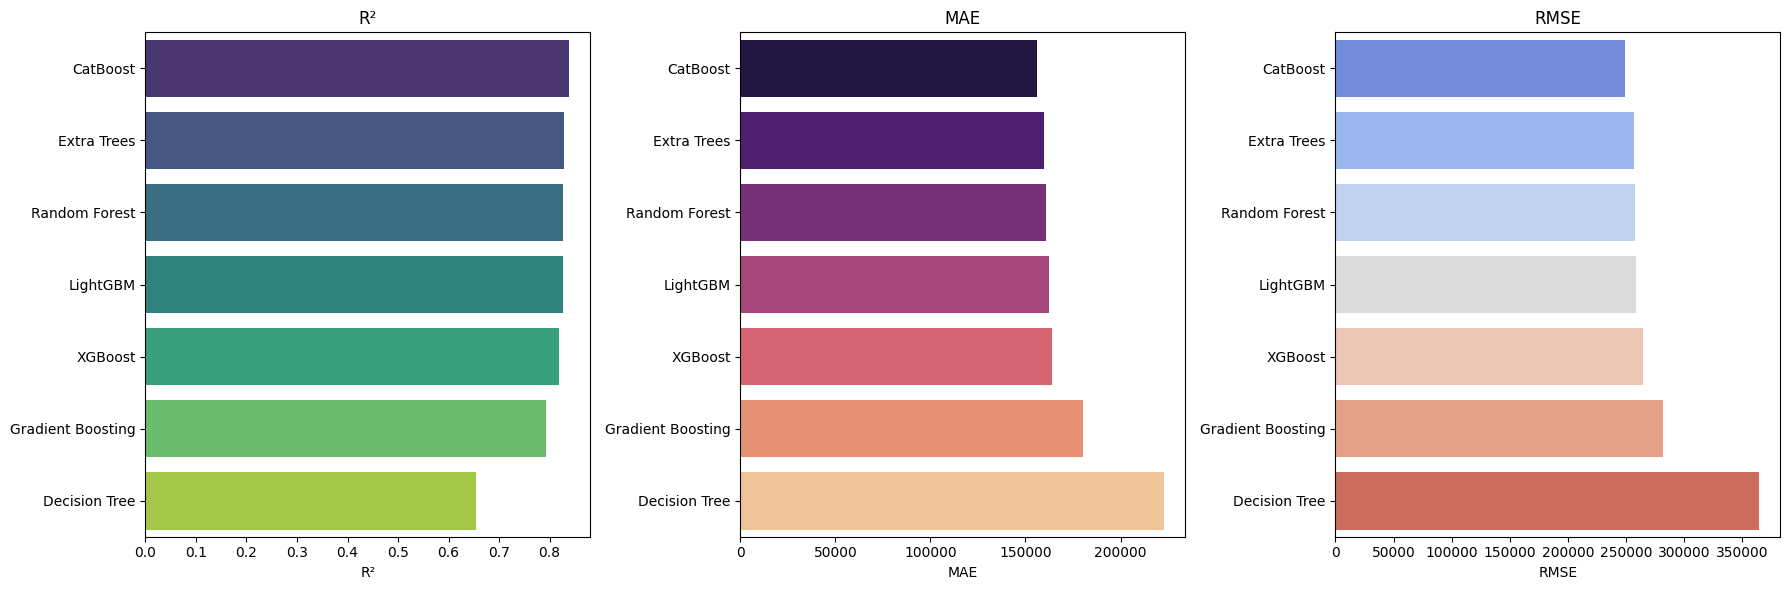

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# R²
sns.barplot(data=results_df, x='R2', y='Model', palette='viridis', ax=axes[0])
axes[0].set_title('R²')
axes[0].set_xlabel('R²')
axes[0].set_ylabel('')

# MAE
sns.barplot(data=results_df, x='MAE', y='Model', palette='magma', ax=axes[1])
axes[1].set_title('MAE')
axes[1].set_xlabel('MAE')
axes[1].set_ylabel('')

# RMSE
sns.barplot(data=results_df, x='RMSE', y='Model', palette='coolwarm', ax=axes[2])
axes[2].set_title('RMSE')
axes[2].set_xlabel('RMSE')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

## **Summary:**
##### Based on the evaluation metrics, CatBoost is the best performing model among all.
##### Therefore, we will proceed with hyperparameter tuning to further improve its performance.

## **CatBoost Tuning**

In [143]:
cat_model= CatBoostRegressor(silent= True, random_state=42)

param_dist= {
    'depth': [4,6,8,10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [500, 1000, 1500],
    'bagging_temperature': [0, 1, 2, 3]
}

# Randomized Search
random_search= RandomizedSearchCV(
    estimator= cat_model,
    param_distributions= param_dist,
    n_iter= 20,
    scoring= 'r2',
    cv= 3,
    verbose= 2,
    random_state= 42,
    n_jobs= -1
)

random_search.fit(X_train_enc, y_train)

print(f"Best Parameters:", random_search.best_params_)
print(f"Best R2 on CV:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 0}
Best R2 on CV: 0.8160394617485954
[CV] END bagging_temperature=3, depth=6, iterations=1500, l2_leaf_reg=9, learning_rate=0.01; total time=  24.5s
[CV] END bagging_temperature=1, depth=6, iterations=1500, l2_leaf_reg=5, learning_rate=0.05; total time=  22.3s
[CV] END bagging_temperature=1, depth=6, iterations=1500, l2_leaf_reg=5, learning_rate=0.05; total time=  23.8s
[CV] END bagging_temperature=1, depth=6, iterations=1500, l2_leaf_reg=5, learning_rate=0.05; total time=  22.6s
[CV] END bagging_temperature=3, depth=8, iterations=1500, l2_leaf_reg=7, learning_rate=0.03; total time=  44.0s
[CV] END bagging_temperature=3, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time= 1.2min
[CV] END bagging_temperature=0, depth=10, iterations=1000, l2_leaf_reg=7, learning_rate=0.1; total time= 1.2min
[CV]

In [144]:
final_catboost= CatBoostRegressor(
    **random_search.best_params_,
    silent= True,
    random_state= 42
)

final_catboost.fit(X_train_enc, y_train)
y_pred= final_catboost.predict(X_test_enc)

r2= r2_score(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))

print("Final CatBoost Performance on Test Set:")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae: ,.0f}")
print(f"RMSE: {rmse: ,.0f}")

Final CatBoost Performance on Test Set:
R2: 0.8381
MAE:  157,056
RMSE:  249,627


## **Conclusion**

### The hyperparameter tuning of the CatBoost model did not significantly increase the R² score
### It confirmed the stability and reliability of the model’s performance on unseen data
### This indicates that the model was already well-optimized, and tuning mainly ensured consistent generalization rather than large improvements in metrics

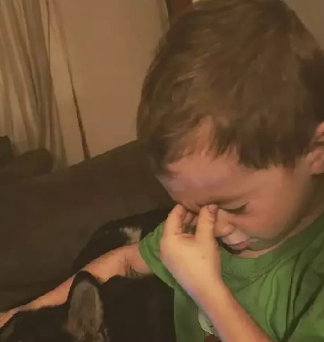

In [156]:
from IPython.display import Image, display

Image(filename="/kaggle/input/funny-photo/Screenshot 2025-08-14 011941.png")